# CS 4820
# Assignment 5: Multi-Class Classification, Data Pre-processing, and Model Analysis

# Due: 2:00pm October 9, 2019

In this assignment, you are asked to build an ANN model to classify wines in the "*wines*" dataset into three mutually exclusice classes. Treat the first column in the data set as the target column.

Use __Tutorial 6__ as your reference when working on this assignment.

### 0. The *wines* Dataset and Data Preprocessing


In [21]:
#import matplotlib.pyplot as plt
import pandas as pd

# allow multiple outputs be displayed for each cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Importing the dataset
df = pd.read_csv('./data/wines.csv')
df.head(5)

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [22]:
X = df.drop('Class', axis=1)
X.head(5)

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [23]:
targets = df['Class'].unique()
targets

array([1, 2, 3], dtype=int64)

In [24]:
target_dict={n:i for i, n in enumerate(targets)}
target_dict

{1: 0, 2: 1, 3: 2}

In [25]:
y=df['Class'].map(target_dict)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [26]:
from tensorflow.keras.utils import to_categorical

y_cat = to_categorical(y)
y_cat[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat, test_size = 0.2, random_state = 0, stratify=y_cat)
X_train.shape
y_train.shape

(142, 13)

(142, 3)

### 1. Multi-Class Classification Model


In [28]:
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(3, input_dim = 13, activation = 'softmax'))
model.compile(optimizer = 'Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, validation_split=0.1, batch_size = 2, epochs = 100, verbose=2)

Train on 127 samples, validate on 15 samples
Epoch 1/100
127/127 - 0s - loss: 340.1957 - accuracy: 0.2677 - val_loss: 432.4024 - val_accuracy: 0.2667
Epoch 2/100
127/127 - 0s - loss: 270.8468 - accuracy: 0.2677 - val_loss: 345.9466 - val_accuracy: 0.2667
Epoch 3/100
127/127 - 0s - loss: 201.7367 - accuracy: 0.2677 - val_loss: 264.8183 - val_accuracy: 0.2667
Epoch 4/100
127/127 - 0s - loss: 135.1784 - accuracy: 0.3386 - val_loss: 185.3725 - val_accuracy: 0.3333
Epoch 5/100
127/127 - 0s - loss: 88.4927 - accuracy: 0.4173 - val_loss: 122.8841 - val_accuracy: 0.2667
Epoch 6/100
127/127 - 0s - loss: 59.5036 - accuracy: 0.4252 - val_loss: 74.9516 - val_accuracy: 0.2667
Epoch 7/100
127/127 - 0s - loss: 32.8050 - accuracy: 0.4252 - val_loss: 30.9152 - val_accuracy: 0.2667
Epoch 8/100
127/127 - 0s - loss: 16.5602 - accuracy: 0.2992 - val_loss: 14.2649 - val_accuracy: 0.2000
Epoch 9/100
127/127 - 0s - loss: 14.0036 - accuracy: 0.3937 - val_loss: 11.7796 - val_accuracy: 0.3333
Epoch 10/100
127/12

Epoch 81/100
127/127 - 0s - loss: 0.2894 - accuracy: 0.8976 - val_loss: 0.3355 - val_accuracy: 0.9333
Epoch 82/100
127/127 - 0s - loss: 0.2595 - accuracy: 0.9291 - val_loss: 0.5487 - val_accuracy: 0.8000
Epoch 83/100
127/127 - 0s - loss: 0.2937 - accuracy: 0.9291 - val_loss: 0.2378 - val_accuracy: 0.9333
Epoch 84/100
127/127 - 0s - loss: 0.3411 - accuracy: 0.8898 - val_loss: 0.7327 - val_accuracy: 0.8000
Epoch 85/100
127/127 - 0s - loss: 0.2229 - accuracy: 0.9213 - val_loss: 0.2768 - val_accuracy: 0.9333
Epoch 86/100
127/127 - 0s - loss: 0.3282 - accuracy: 0.9213 - val_loss: 0.1401 - val_accuracy: 0.9333
Epoch 87/100
127/127 - 0s - loss: 0.2713 - accuracy: 0.9134 - val_loss: 0.2416 - val_accuracy: 0.9333
Epoch 88/100
127/127 - 0s - loss: 0.2406 - accuracy: 0.9134 - val_loss: 0.1970 - val_accuracy: 0.9333
Epoch 89/100
127/127 - 0s - loss: 0.2658 - accuracy: 0.9213 - val_loss: 0.2348 - val_accuracy: 0.8667
Epoch 90/100
127/127 - 0s - loss: 0.2677 - accuracy: 0.9134 - val_loss: 0.5475 - v

In [29]:
y_pred = model.predict(X_test)
y_pred
y_test

array([[2.24204175e-03, 9.97550309e-01, 2.07626348e-04],
       [3.22931046e-05, 8.65204420e-05, 9.99881148e-01],
       [8.62658781e-04, 9.76057589e-01, 2.30797064e-02],
       [1.13148062e-05, 1.03505526e-03, 9.98953581e-01],
       [7.79557467e-06, 9.99955177e-01, 3.70497110e-05],
       [9.75645423e-01, 2.31581349e-02, 1.19641959e-03],
       [9.99826968e-01, 1.42702411e-04, 3.03441775e-05],
       [3.07241044e-06, 9.59328027e-04, 9.99037623e-01],
       [2.15746672e-03, 9.93062437e-01, 4.78001684e-03],
       [7.62889758e-05, 9.74593513e-06, 9.99913931e-01],
       [9.99987721e-01, 5.01932982e-06, 7.27621955e-06],
       [9.99999642e-01, 1.78793670e-07, 1.87191247e-07],
       [9.74105613e-04, 2.29385239e-03, 9.96731997e-01],
       [1.91269461e-02, 9.37380016e-01, 4.34930362e-02],
       [1.79942635e-05, 9.99969006e-01, 1.29957352e-05],
       [9.95027335e-07, 9.99969482e-01, 2.95712744e-05],
       [9.21949267e-01, 7.72415027e-02, 8.09186837e-04],
       [1.66803792e-01, 7.81689

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [30]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

y_test_class[:4]
y_pred_class[:4]

array([1, 2, 1, 2], dtype=int64)

array([1, 2, 1, 2], dtype=int64)

### 2. Model Analysis

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.78      1.00      0.88        14
           2       1.00      0.80      0.89        10

   micro avg       0.89      0.89      0.89        36
   macro avg       0.93      0.88      0.89        36
weighted avg       0.91      0.89      0.89        36



In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix

cm = confusion_matrix(y_test_class, y_pred_class)
pd.DataFrame(cm, index=targets)

,0,1,2
1,10,2,0
2,0,14,0
3,0,2,8


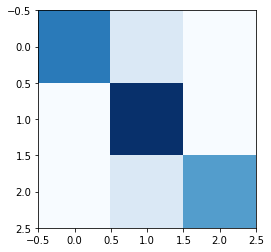

In [33]:
import matplotlib.pyplot as plt

plt.imshow(cm, cmap='Blues');

C:\Users\joldf\Anaconda3\envs\CS4820\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\joldf\Anaconda3\envs\CS4820\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


Text(0.5, 0.98, 'The Wines Dataset')

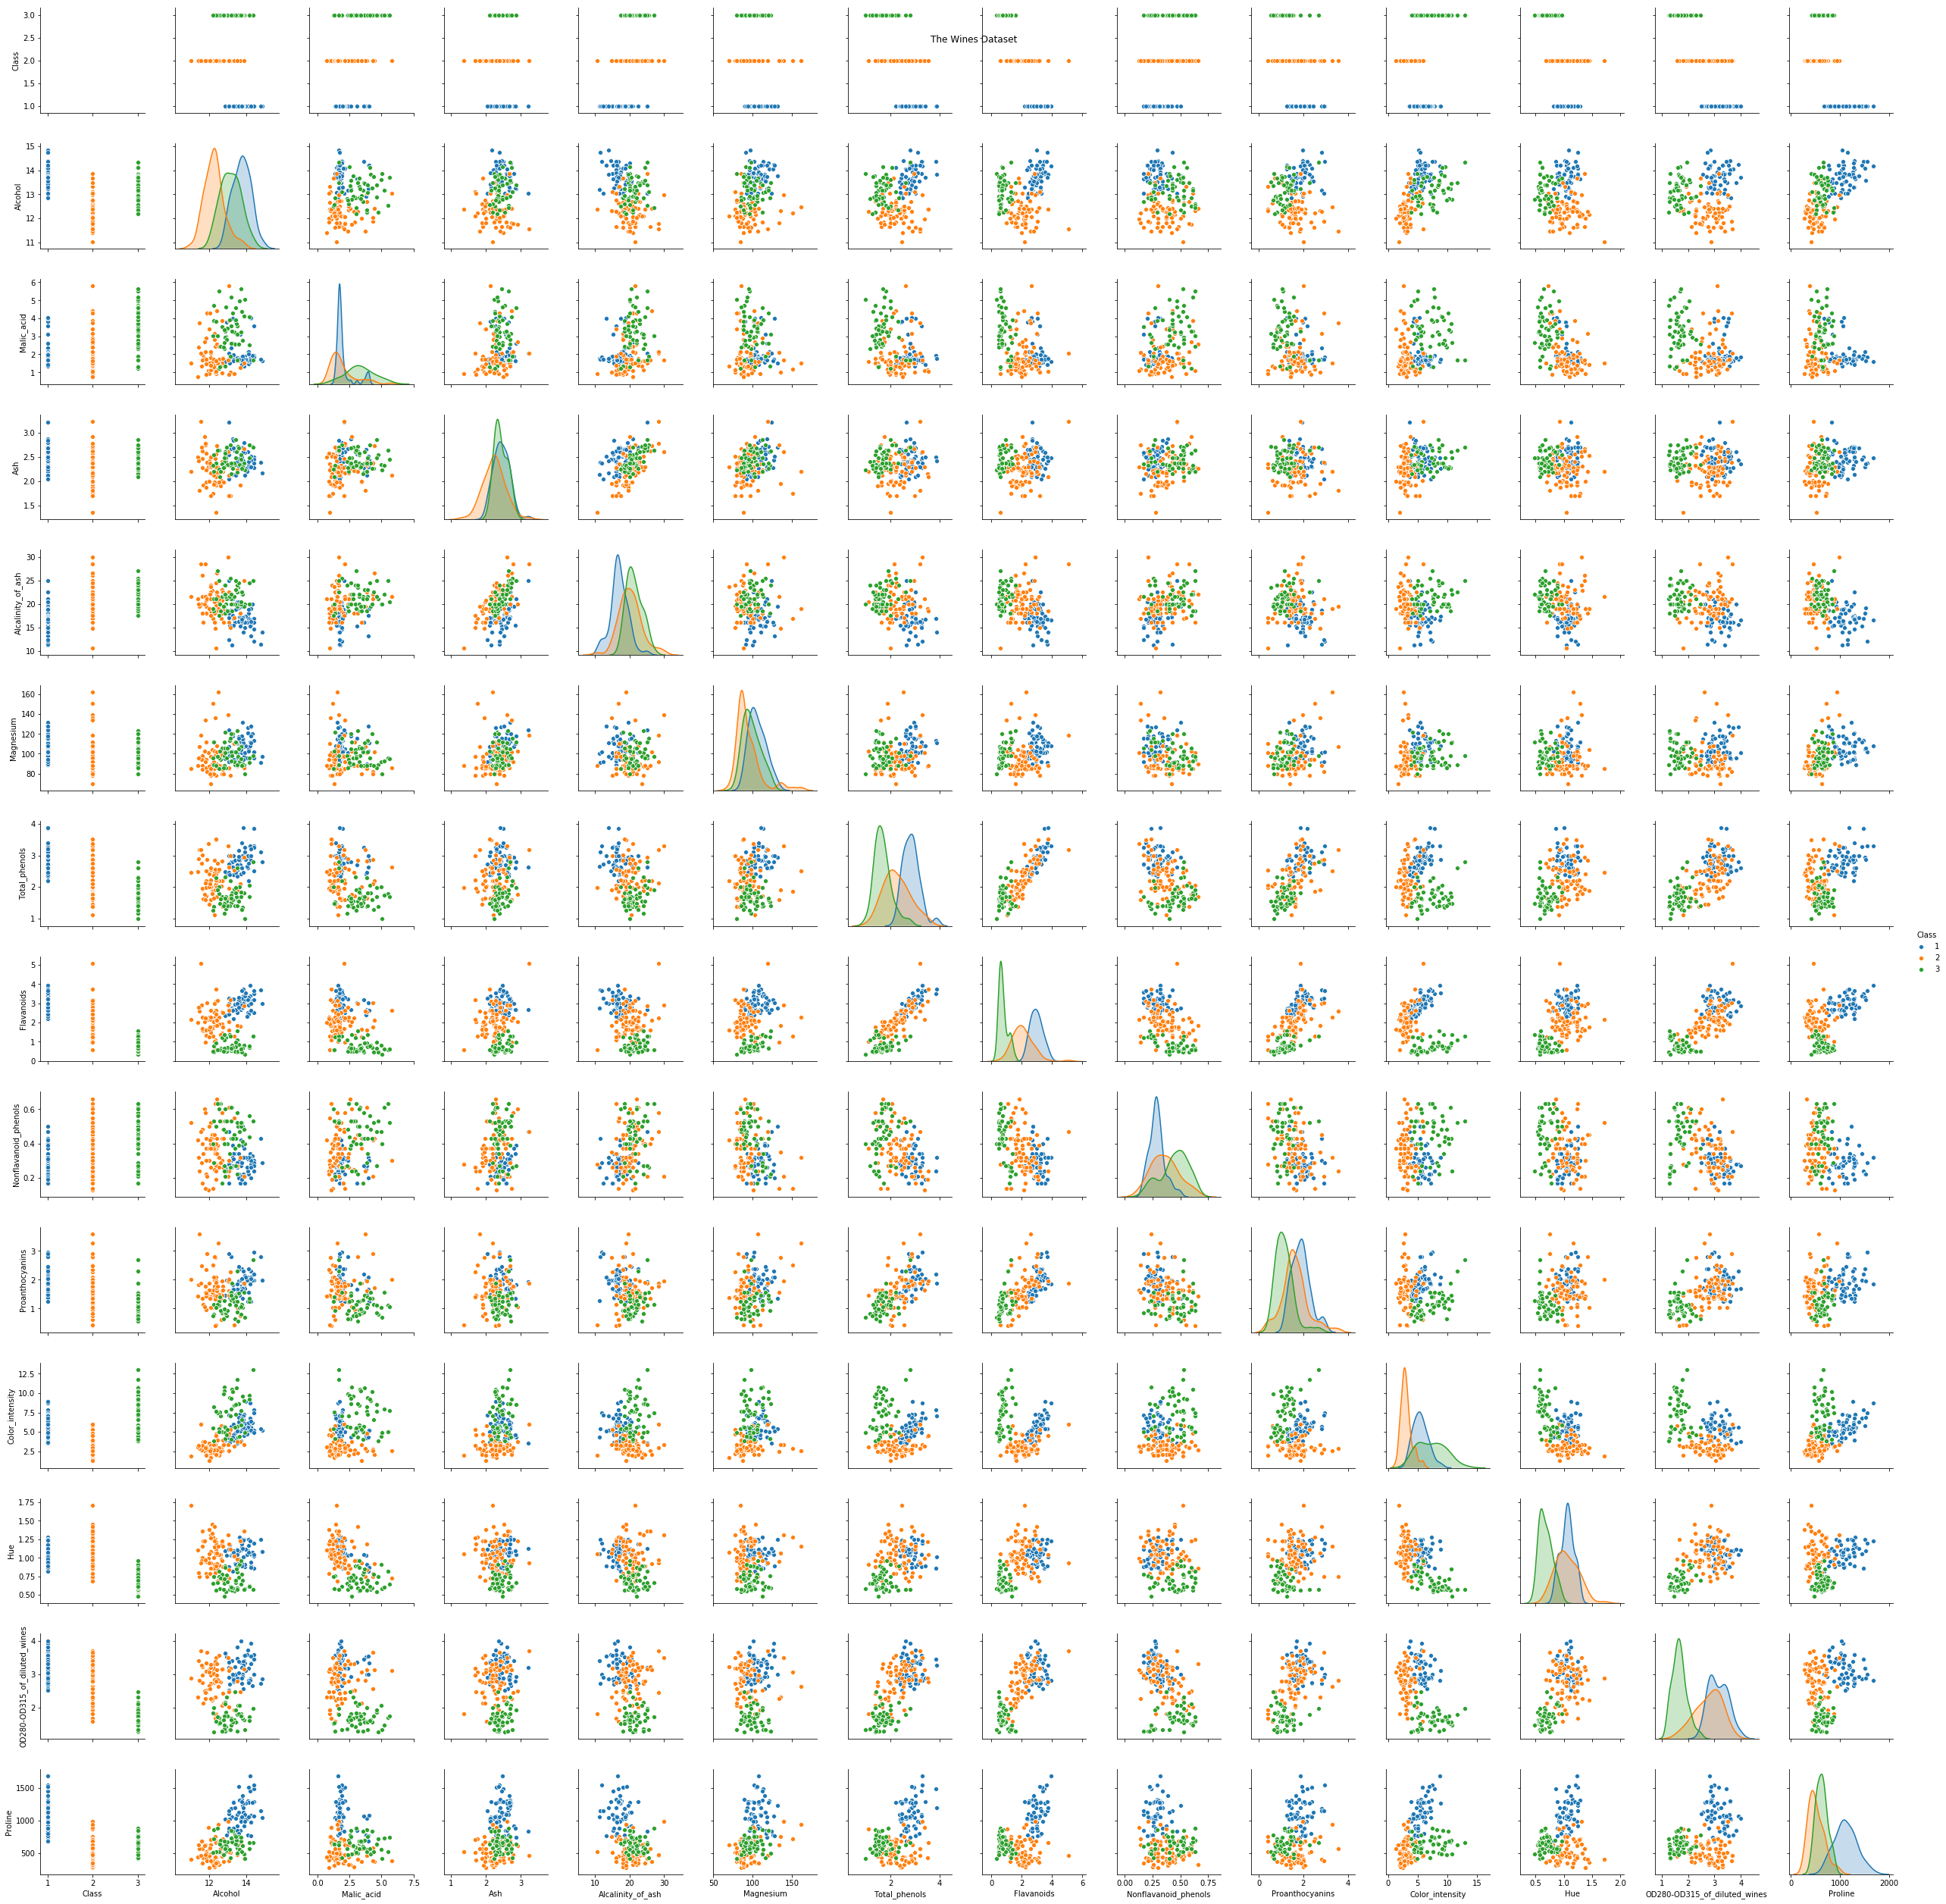

In [34]:
import seaborn as sns

g = sns.pairplot(df, hue="Class")
g.fig.suptitle('The Wines Dataset')

In [35]:
print('Test accuracy for our ANN model:', \
      round(accuracy_score(y_test_class, y_pred_class)*100, 2),'%')

Test accuracy for our ANN model: 88.89 %
